# 1
## Критерий
Основная гипотеза отвергается только в случае, если все элементы выборки $X_i \in \mathbf{Z}_{+}$.
## Утверждение
Вероятность ошибки первого и второго рода равна нулю.
## Доказательство
Ошибка первого рода - ситуация, в которой $\forall i: X_i \in \mathbf{Z}_{+}$ принадлежали нормальному распределению. Вероятность этого события равна нулю, поскольку вероятность получить натуральное число из непрерывного распределения нулевая.\
Ошибка второго рода - ситуация, в которой $\exists i: X_i \notin \mathbf{Z}_{+}$, при этом выборка из распределения Пуассона. Такая ситуация невозможна, поскольку носитель распределения Пуассона $\mathbf{Z}_{+}$

# 2
Распишем формулу Байеса для нашей задачи
$$P(p \mid X) = \frac{P(X \mid p) \cdot P(p)}{\frac{1}{5}P\left(X \mid \frac{1}{3}\right) + \frac{4}{5}P\left(X \mid \frac{2}{3}\right)}$$
$$P(X \mid p) = \prod\limits_{i=1}^n{\binom{m}{X_i}p^{X_i}q^{m-X_i}}$$
Среди $p = \frac{1}{3}$ и $p = \frac{2}{3}$ выберем ту, значение $P(p \mid X)$ при которой больше. Заметим, что знаменатель этой величины не зависит от $p$, поэтому можно смотреть только на произведение $P(X \mid p) \cdot P(p)$. Таким образом, критерий выглядит как:
$$P\left(\frac{1}{3} \mid X\right) \leq P\left(\frac{2}{3} \mid X\right)$$
$$P\left(X \mid \frac{1}{3}\right) \cdot P\left(\frac{1}{3}\right) \leq P\left(X \mid \frac{2}{3}\right) \cdot P\left(\frac{2}{3}\right)$$
$$\frac{1}{5} \cdot \prod\limits_{i=1}^n{\binom{m}{X_i} \left(\frac{1}{3}\right)^{X_i} \left(\frac{2}{3}\right)^{m-X_i}} \leq \frac{4}{5} \cdot \prod\limits_{i=1}^n{\binom{m}{X_i} \left(\frac{2}{3}\right)^{X_i} \left(\frac{1}{3}\right)^{m-X_i}}$$
$$\prod\limits_{i=1}^n{2^{m-X_i}} \leq 4\prod\limits_{i=1}^n{2^{X_i}}$$
$$2^{nm-\sum\limits_{i=1}^n{X_i}} \leq 2^{2+\sum\limits_{i=1}^n{X_i}}$$
$$nm \leq 2 + 2\sum\limits_{i=1}^n{X_i}$$
$$\frac{m}{2} \leq \frac{1}{n} + \overline{X}$$

# 3
Даны две выборки из нормального распределения $X_{1..n}$ и $Y_{1..m}$ с известными средними $\mu_1$ и $\mu_2$. Построим критерий для проверки равенства их дисперсий.\
Исходя из предположения, что основная гипотеза верна ($\sigma_1 = \sigma_2 = \sigma$), построим статистику следующим образом. Приведем каждый элемент выборки к стандартному нормальному распределению
$$\frac{X_i - \mu_1}{\sigma}$$
$$\frac{Y_i - \mu_2}{\sigma}$$
Сумма квадратов данных величин по каждой из выборок будет иметь распределение Пирсона со степенями свободы $n$ и $m$ соответственно. Значит, поделив каждое на размер выборки, а затем друг на друга, мы получим распределение Фишера со степенями свободы $n, m$. Таким образом, итоговая статистика $f$ считается как:
$$f = \frac{m}{n} \cdot \frac{\sum\limits_{i=1}^n{\frac{(X_i - \mu_1)^2}{\sigma}}}{\sum\limits_{i=1}^m{\frac{(Y_i - \mu_2)^2}{\sigma}}} = \frac{m}{n} \cdot \frac{\sum\limits_{i=1}^n{(X_i - \mu_1)^2}}{\sum\limits_{i=1}^m{(Y_i - \mu_2)^2}} \sim F(n,m)$$

# 4
Необходимым условием для использования однофакторного дисперсионного анализа является равенство дисперсий, на которое мы будем полагаться.
## Критерий Стьюдента
$$t = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{\sum\limits_{i=1}^n{(\overline{X} - X_i)^2} + \sum\limits_{i=1}^m{(\overline{Y} - Y_i)^2}}{n + m - 2}} \cdot \sqrt{\frac{1}{n} + \frac{1}{m}}} \sim T(n + m - 2) \sim \frac{N(0, 1)}{\sqrt{\frac{H(n + m - 2)}{n + m - 2}}}$$
## Однофакторный дисперсионный анализ
$$\rho = (n + m - 2) \cdot \frac{S_{out}^2}{S_{in}^2} \sim F(1, n + m - 2) \sim (n + m - 2) \cdot \frac{N^2(0, 1)}{H(n + m - 2)}$$
Где $S_{in}$ - межгрупповая дисперсия, $S_{out}$ - внутригрупповая дисперсия.
## Эквивалентность
Как можно легко заметить, статистики $t$ и $\rho$ эквивалентны с точностью до квадрата $$t^2 \sim \rho$$ а значит являются эквивалентными с точки зрения статистической значимости.

## Экспериментальная проверка

In [ ]:
from scipy.stats import norm, ttest_ind, f_oneway, randint
from math import *

eps = 1e-9
ssize = 1000

def eq(a, b):
  return abs(a - b) < eps

def check(loc1, loc2):
  a = norm.rvs(loc=loc1, size=ssize)
  b = norm.rvs(loc=loc2, size=ssize)
  s1, p1 = ttest_ind(a, b, equal_var=True)
  s2, p2 = f_oneway(a, b)
  if not eq(abs(s1), sqrt(s2)) or not eq(p1, p2):
    print("Fail")
    print(s1, p1)
    print(s2, p2)
    exit(1)

for i in range(40):
  loc1 = randint.rvs(-10, 10)
  loc2 = randint.rvs(-10, 10)
  check(loc1, loc2)

for i in range(10):
  loc = randint.rvs(-10, 10)
  check(loc, loc)

print("Success")

Success


# 5
Пользуясь экспертом, который умеет сравнивать двух детей, мы можем придумать меру способности к математике. Для этого отсортируем детей при помощи сравнений (например быстрой сортировкой Хоара), после чего будем перебирать детей по возрастающей. Самому "неинтересующемуся" ребенку выдадим меру 1. Каждому следующему выдадим значение предыдущего +1, если он более увлечен математикой; или же значение предыдущего, если они одинаково увлечены. Точно такую же меру можно ввести для увлеченности настольными играми. Теперь у нас формально оцифрованы интересуемые параметры. Введенные меры не оценивают увлеченность математикой количественно, только качественно. Для оценки существования линейной взаимосвязи между некими "истинными" мерами увлеченностями подойдет коэффициент корреляции Спирмена, который является ранговым и не зависит от монотонных преобразований параметров (при переходе от "истинной" меры к ранговой порядок детей не поменялся).

# 6
Грубая реализация алгоритма недобросовестных исследователей (перебор границы для X, перебор границы для Y, подсчет количества точек в каждом квадранте) работает за $O(n^3)$. Соптимизируем до $O(n^2)$. Зафиксируем границу $x_1$ для $X$. Будем перебирать границу $y_1$ для $Y$ и пересчитывать количество $v_{11}$ точек $(x, y) : x \leq x_1, y \leq y_1$, которое изначально равно нулю.
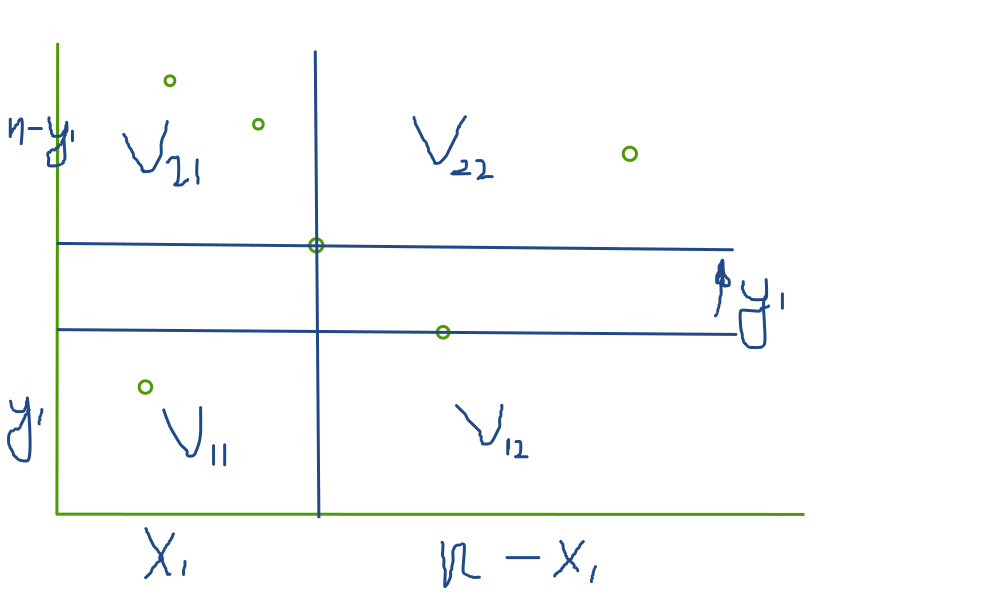
При переходе $y_1$ к следующему значению, посмотрим, не больше ли x-координата новой точки, чем $x_1$. Если да - значение $v_{11}$ увеличилось на 1, иначе - осталось прежним. Остальные квадранты выражаются через $v_{11}$, $x_1$ и $y_1$.
$$v_{12} = y_1 - v_{11}$$
$$v_{21} = x_1 - v_{11}$$
$$v_{22} = n - x_1 - y_1 + v_{11}$$

In [ ]:
from math import *
from scipy.stats import norm, uniform

N = 100
EPS = 1e-6
CRIT = 3.8
SIZE = 1000
rejected = 0

def generate():
    x = list(uniform.rvs(size=SIZE))
    y = list(norm.rvs(size=SIZE))
    return list(zip(x, y))

def f(Vij, Xi, Yj):
    prod = Xi * Yj
    return (Vij - prod / SIZE) ** 2 / prod

def test(sample):
    global rejected
    xs = sample.copy()
    ys = sample.copy()
    xs.sort(key=lambda x: x[0])
    ys.sort(key=lambda x: x[1])
    chi = 0
    for i in range(SIZE - 1):
        x1 = i + 1
        v11 = 0
        for j in range(SIZE - 1):
            y1 = j + 1
            if ys[j][0] <= xs[i][0]:
                v11 += 1
            chi = max(chi,
                    f(v11, x1, y1) +
                    f(y1 - v11, SIZE - x1, y1) +
                    f(x1 - v11, x1, SIZE - y1) +
                    f(SIZE - x1 - y1 + v11, SIZE - x1, SIZE - y1))
    chi *= SIZE
    if chi > CRIT:
        rejected += 1

for i in range(N):
    test(generate())

print(rejected)
print(rejected / N)

100
1.0


# 7

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import *

## a

In [ ]:
df = pd.read_csv('data_regr_penalty.csv')[['x1', 'x2', 'x3', 'y']]
df.head()

,x1,x2,x3,y
0,-0.659200,-0.456259,2.593243,-0.704146
1,-1.703340,-0.182389,0.397844,1.929837
2,-1.379538,-0.745567,1.501915,-3.894091
3,-1.746047,0.214177,1.157963,-6.418149
4,-1.898107,-0.534851,1.464105,-10.468460


In [ ]:
def test_norm(param):
  if sc.stats.normaltest(df[param]).pvalue < 0.05:
    print(f'parameter %s has non-normal distribution' % param)

for column in df.columns:
  test_norm(column)

parameter x1 has non-normal distribution


In [ ]:
df.x1 = sc.stats.yeojohnson(df.x1)[0]
test_norm('x1')

## b

In [ ]:
X = df.drop('y', axis=1)
Y = df.y

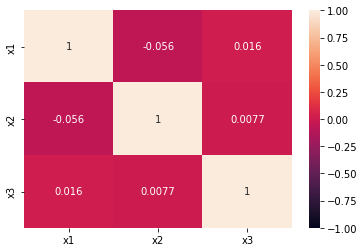

In [ ]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)

In [29]:
print(sc.stats.pearsonr(X.x1, X.x2))
print(sc.stats.pearsonr(X.x1, X.x3))
print(sc.stats.pearsonr(X.x2, X.x3))

(-0.055589054376132666, 0.2673613447617456)
(0.016191938649002667, 0.7468115063173661)
(0.007711943854352747, 0.8778001784272594)


Предикторы не скоррелированы между собой.

## c

In [ ]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print('R2 = ' + str(reg.score(X, Y)))

[ 1.94342022  3.28693675 -1.09036101]
R2 = 0.6649808679611118


## d

In [ ]:
mu1 = np.mean(df.x1)
sigma1 = sqrt(np.var(df.x1, ddof=1))
mu2 = np.mean(df.x2)
sigma2 = sqrt(np.var(df.x2, ddof=1))
mu3 = np.mean(df.x3)
sigma3 = sqrt(np.var(df.x3, ddof=1))
muy = np.mean(df.y)
sigmay = sqrt(np.var(df.y, ddof=1))

In [ ]:
coef_sample = [LinearRegression().fit(
    pd.DataFrame(data={'x1': np.random.normal(loc=mu1, scale=sigma1, size=df.size),
                       'x2': np.random.normal(loc=mu2, scale=sigma2, size=df.size),
                       'x3': np.random.normal(loc=mu3, scale=sigma3, size=df.size)}),
    np.random.normal(loc=muy, scale=sigmay, size=df.size)).coef_ for _ in range(1000)]
coef_sample = [[c3[i] for c3 in coef_sample] for i in range(3)]

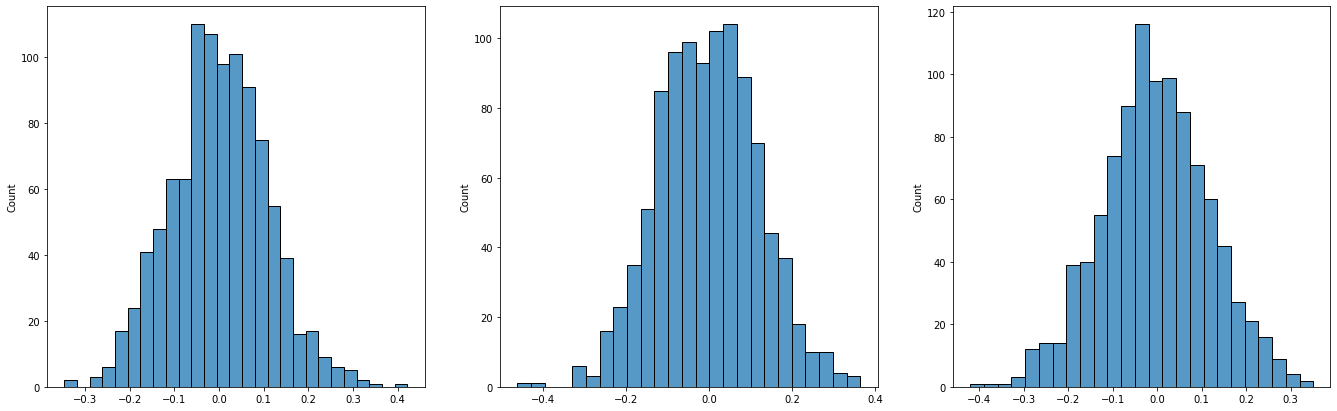

In [ ]:
fig, axis = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(23)
for i in range(3):
  sns.histplot(coef_sample[i], ax=axis[i])

Все коэффициенты распределены нормально.

In [ ]:
for i in range(3):
  q = sc.stats.percentileofscore(coef_sample[i], reg.coef_[i])
  if 2.5 < q and q < 97.5:
    print(f'x%d not significantly different from zero' % i + 1)

## e

In [ ]:
def autocorr(s, lag=1):
  return np.corrcoef(np.array([s[:-lag], s[lag:]]))[0][1]

y = reg.predict(X)
autocorr(y)

-0.03296551933427524

In [ ]:
err = y[:-1] - y[1:]
mu_err = np.mean(err)
sigma_err = np.var(err, ddof=1)
(mu_err, sigma_err)

(0.00028585285052429966, 34.34449286927897)

In [ ]:
autocorr_sample = [autocorr(np.random.normal(loc=mu_err, scale=sigma_err, size=df.size)) for _ in range(1000)]
sc.stats.percentileofscore(autocorr_sample, autocorr(y))

9.1

Остатки не смещены ($\mu_{err} \approx 0$) и неавтокоррелируемы.